# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 1. Простой анализ данных.


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 9ede240862d9bf1602556040405c317e -->
---
### <font color="blue"><i>Легкая часть</i></font>

### Задача 1

На семинаре мы разбирали классификацию изображений на основе kNN. В этом задании мы вернемся к датасету [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) и попробуем улучшить результат, полученный на семинаре.

Для начала, загрузите данные и разделите их на обучающую и тестовую части.

In [182]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

random_state = 42

digits = datasets.load_digits()

n_samples = len(digits["images"])
X, y = digits["images"].reshape(n_samples, -1), digits["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=random_state
)

Число соседей в модели kNN является необучаемым параметром т.е. гиперпараметром который выставляется вручную. Как мы видели на лекции, выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.

Постройте график зависимости точности (`accuracy_score`) предсказания kNN от значения $k$ (от 1 до 20) для обучающей и тестовой выборок.

Построим график для тестовой выборки

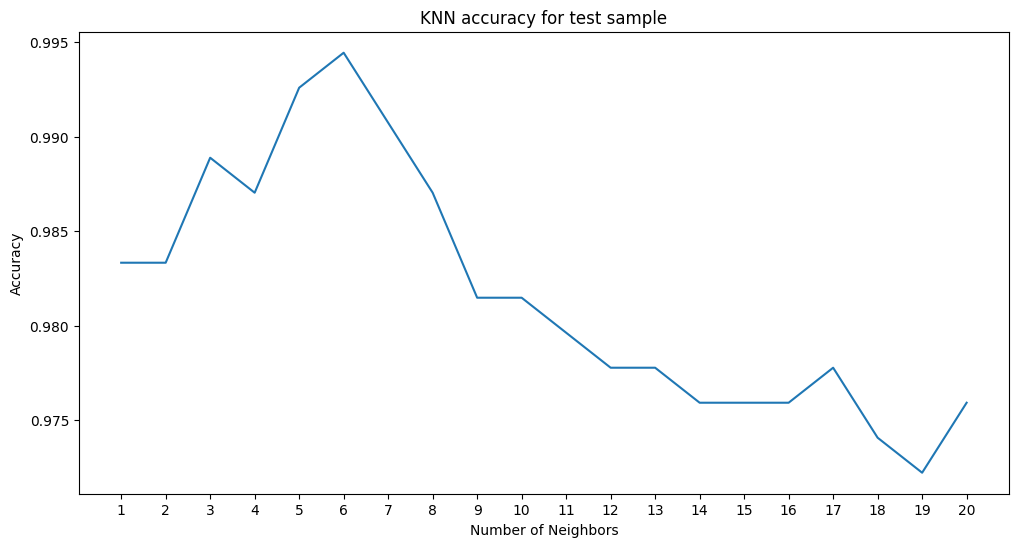

In [183]:
plt.figure(figsize=(12, 6))

accuracy_scores = []

for i in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=i, algorithm="brute")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    score = accuracy_score(y_test, y_pred)
    accuracy_scores.append(score)

plt.plot(np.arange(1, 21, 1), accuracy_scores)
plt.xticks(np.arange(1, 21, 1))

plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN accuracy for test sample')

plt.show()

Теперь для тренировочной

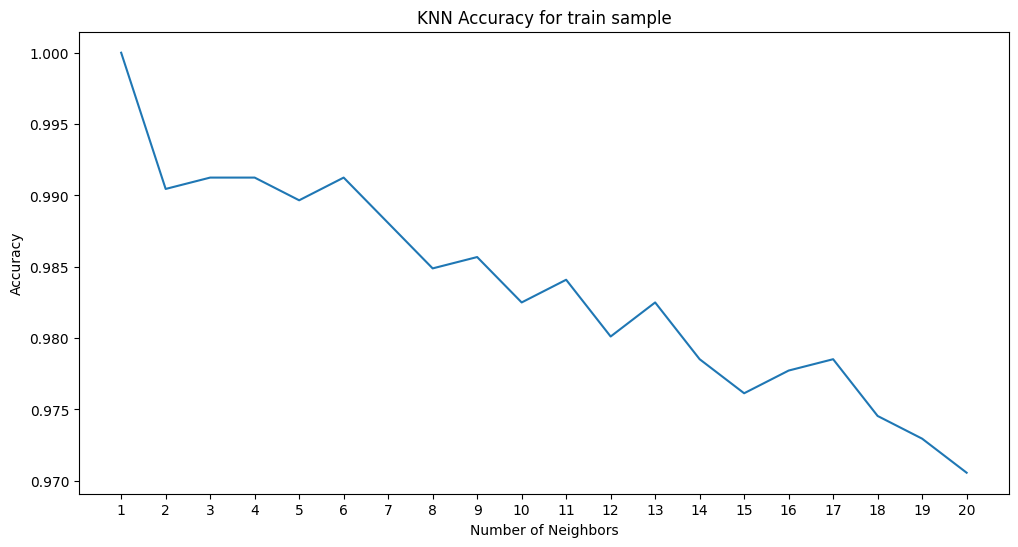

In [184]:
plt.figure(figsize=(12, 6))

accuracy_scores = []

for i in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=i, algorithm="brute")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)

    score = accuracy_score(y_train, y_pred)
    accuracy_scores.append(score)

plt.plot(np.arange(1, 21, 1), accuracy_scores)
plt.xticks(np.arange(1, 21, 1))

plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for train sample')

plt.show()

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- fe9171a6e245a953987df27f018c61c2 -->
&#x2753; **Вопрос** &#x2753;

> Почему при $k = 1$ на тренировочной выборке метрика качества составляет 100%.

**Ваш ответ:**

> Потому что при прогнозировании тренировочной выборки при $k = 1$ ближайшим соседом объекта является он сам


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- cdb15caec1719ca7ba80d25b716879ca -->
Помимо числа соседей гиперпараметром модели также является *метрика расстояния* между объектами.

> По умолчанию используется *Евклидова метрика* ($L_2$), согласно которой расстояние между двумя точками $x_1 =(x_{11}, …, x_{1d})$ и $x_2=(x_{21},…,x_{2n})$ в $d$-мерном пространстве определяется как:
$$\rho(x_1, x_2) = \sqrt{\sum^d_{j=1}\left(x_{1j} - x_{2j}\right)^2}.$$
>
> Иногда в kNN имеет смысл использовать другие метрики, например *метрику Манхэттена* ($L_1$).
$$\rho(x_1, x_2) = \sum^d_{j=1} \left|x_{1j} - x_{2j}\right|.$$
>
> Выбор одной из них зависит от особенностей задачи и данных. В частности,
>
> * метрика Манхэттена менее чувствительна к выбросам, чем евклидово расстояние, что делает её полезной для данных с сильным шумом или при наличии аномалий;
>
> * в задачах с разреженными данными (например, текстовые данные, представленные в виде векторов) метрика Манхэттена может работать лучше, чем евклидово расстояние.

Проведите аналогичный эксперимент используя в качестве гиперпараметра $L_1$-метрику (выясните сами, как ее задать). Выведите на одном графике зависимости точности (accuracy) от значения $k$ для обучающей и тестовой выборок для обоих метрик.

Напишем вспомогательную функцию получения точности предсказания модели

In [185]:
def get_accuracy_scores_by_samples(X_train, y_train, X_test, y_test, metric):
    accuracy_scores = []
    for i in range(1, 21):
        model = KNeighborsClassifier(n_neighbors=i, algorithm="brute", metric=metric)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        accuracy_scores.append(score)
    return accuracy_scores

Инициализируем параметры

In [186]:
metrics = ['manhattan', 'euclidean']
data_sets = [('X_train', 'y_train', 'X_test', 'y_test'), ('X_train', 'y_train', 'X_train', 'y_train')]
labels = ['mh. test', 'mh. train', 'euc. test', 'euc. train']
colors = ['blue', 'orange', 'green', 'red']

Напишем всопомогательную функцию отрисовки графика, которая нам еще понадобится впоследствии

In [187]:
def draw_chart(metrics, data_sets, labels, colors):
    plt.figure(figsize=(12, 6))
    
    for idx, (X_set, y_set, X_target, y_target) in enumerate(data_sets):
        for metric, label, color in zip(metrics, labels[idx::2], colors[idx::2]):
            accuracy_scores = get_accuracy_scores_by_samples(eval(X_set), eval(y_set), eval(X_target), eval(y_target), metric)
            plt.plot(np.arange(1, 21), accuracy_scores, label=label, color=color)
    
    plt.xticks(np.arange(1, 21, 1))
    
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Accuracy')
    plt.title('KNN Accuracy')
    plt.legend()
    
    plt.show()

Отрисуем графики

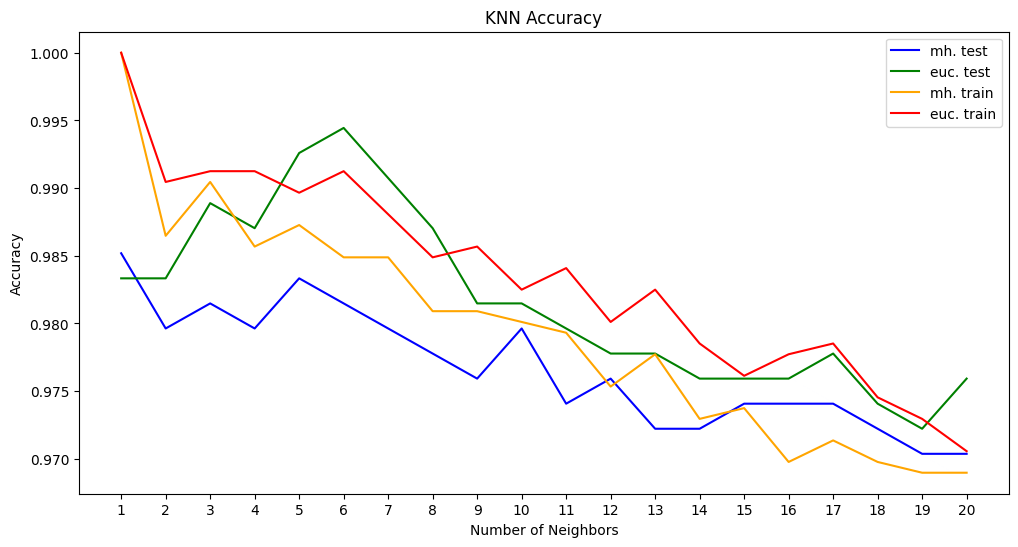

In [188]:
draw_chart(metrics, data_sets, labels, colors)

&#x2754; **Вопрос** &#x2754;

> Как вы думаете почему смена метрики так сильно повлияла на характер кривых?

**Ваш ответ:** 
> Потому что цвета могут принимать 16 значений, а не, например, 2, разница между евклидовой и манхэттенской метрикой становится ощутимой, это можно понять на примере единичного куба, где между противоположными вершинами расстояние по одной метрике $\sqrt3$, а по другой 3, то есть разница увеличилась по сравнению с аналогичной разницей для квадрата

**Выводы:** В задании я проанализировал зависимость точности от числа соседей на тренировочной выборке, нахождение оптимального k оказалось не самой тривиальной задачей, потому что при малом $k$ могут возникать флуктуации в разреженных областях, а при слишком большом модель будет предсказывать цифру, которая чаще всего встречалась в тренировочной выборке. Также я посмотрел на эти зависимости при использовании разных метрик для тренировки, оказалось, что в обоих случаях опимальные $k$ - 5 и 6

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->


---

### Задача 2

Перед выполнением задачи рекомендуется посмотреть <a href="https://thetahat.ru/courses/ad/main/1/main_sem_kNN">материал</a> с семинара.

#### 0. Подготовка данных

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.


Загрузите данные с помощью `pandas`.

In [189]:
import pandas as pd

titanic = pd.read_csv("dataset.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Для лучшего понимания процесса работы с данными, уточним ключевые термины.

> **Объект** — это единица данных, представленная набором признаков и используемая для обучения или предсказаний модели. В данной задаче являются пассажиры, им соответствуют *строки* таблицы данных.
>
> **Признаки (features)** — это характеристики, которые описывают объекты в данных. В таблицах данных они обычно соответствуют *колонкам*. В данной задаче мы будем работать со следующими признаками
>
> * `Pclass` — класс билета (1 = первый класс, 2 = второй класс, 3 = третий класс);
>
> * `Age` — возраст пассажира;
>
> * `SibSp` — количество братьев, сестер или супругов на борту;
>
> * `Parch` — количество родителей или детей на борту;
>
> * `Fare` — стоимость билета.
>
> **Таргет (target)** — это целевая переменная, которую мы хотим предсказать. В данной задаче мы будем предсказывать `Survived` — бинарная переменная, указывающая, выжил ли пассажир (1) или нет (0). Значения этой переменной имеются для обучающего набора данных, а для тестого — нет.

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак, который мы хотим предсказать.

In [190]:
features_columns = ["Pclass", "Age", "Sex", "SibSp", "Parch", "Fare"]
target_column = "Survived"  # Целевой признак

В данных могут присутствовать пропуски. Пока что мы не умеем с ними работать, так что исключим из данных.

Посмотрите, сколько объектов имеют хотя бы один пропуск. Удалите их из данных.

In [191]:
prev_len = len(titanic)
titanic = titanic.dropna(subset=features_columns + [target_column])
prev_len - len(titanic)

177

Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [192]:
X, y = titanic[features_columns], titanic[target_column]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=random_state
)

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 371b31e8ca86989a98cce342afcbbf2a -->
#### 1. Исследование

> &#x2757; **Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно.

*Не забывайте про информативность и эстетичность графиков, посмотрите презентацию про оформление домашних заданий.*

Реализуем функцию для сбора данных по погибшим с определенным дискретным параметром, например `SibSp`

In [193]:
def get_survival_stats_by_param(param):
    survival_stats = {
        'Total amount': [],
        'Survived': []
    }
    
    unique_values = sorted(X_train[param].unique())
    
    for i in unique_values:
        survival_stats['Total amount'].append(X_train[X_train[param] == i].shape[0])
        survival_stats['Survived'].append(X_train[(X_train[param] == i) & (y_train == 1)].shape[0])
    
    total_amount = np.array(survival_stats['Total amount'])
    survived = np.array(survival_stats['Survived'])
    died = total_amount - survived
    
    return unique_values, total_amount, survived, died

Напишем функцю, которая изображает соответствие числа погибших и выживших для людей по значениям определенного параметра
Вспомогательная функция отрисовки столбцов

In [194]:
def draw_bars(param, ax):
    unique_values, total_amount, survived, died = get_survival_stats_by_param(param)
    
    bottom = np.zeros(len(unique_values))
    
    died_bar = ax.bar(unique_values, died / total_amount, label='Died', bottom=bottom)
    
    for i, rect in enumerate(died_bar):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, bottom[i] + height / 2, f'{total_amount[i] - survived[i]}', 
                ha='center', va='center', color='black')
    
    bottom += died / total_amount
    survived_bar = ax.bar(unique_values, survived / total_amount, label='Survived', bottom=bottom)
    
    for i, rect in enumerate(survived_bar):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, bottom[i] + height / 2, f'{survived[i]}', 
                ha='center', va='center', color='white')

Функция отрисовки всего графика

In [195]:
def create_chart_by_discr_param(param):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    draw_bars(param, ax)

    ax.set_xticks(sorted(X_train[param].unique()))
    ax.set_xlabel(f'{param}')
    ax.set_ylabel('Survival Rate')
    ax.set_title(f'Survival Rate by {param}')
    ax.legend()

    plt.tight_layout()
    plt.show()

Отрисуем график соответствия для количества родителей или детей на борту

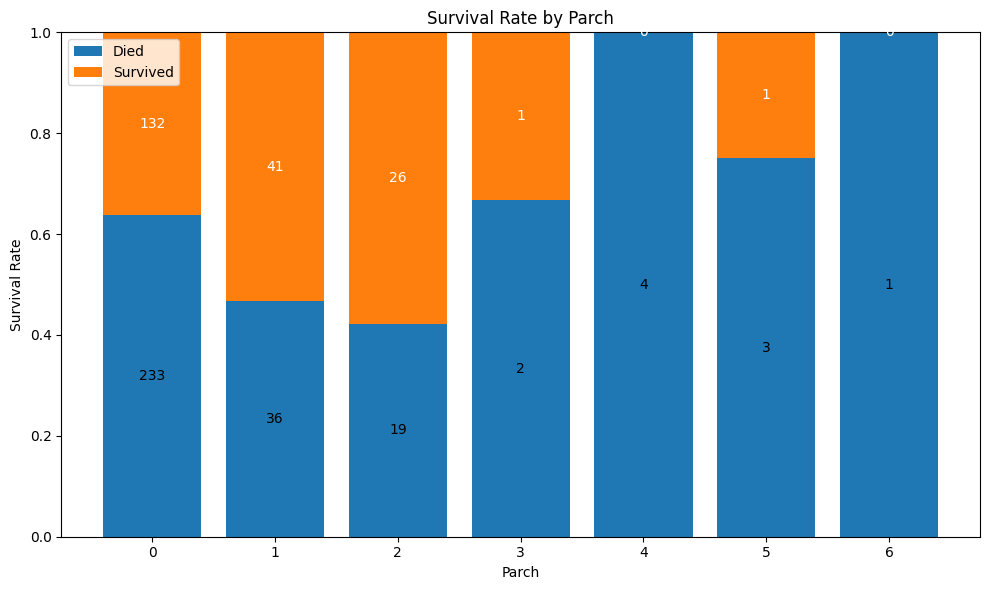

In [196]:
create_chart_by_discr_param('Parch')

Далее, посмотрим как влияет количество братьев, сестер или супругов

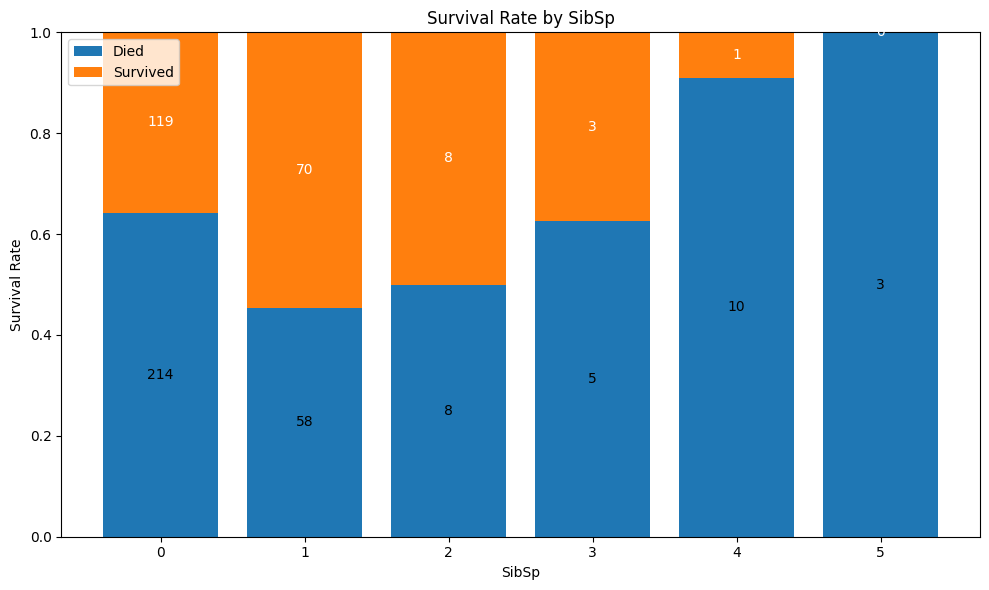

In [197]:
create_chart_by_discr_param('SibSp')

Теперь посмотрим на зависимость от пола

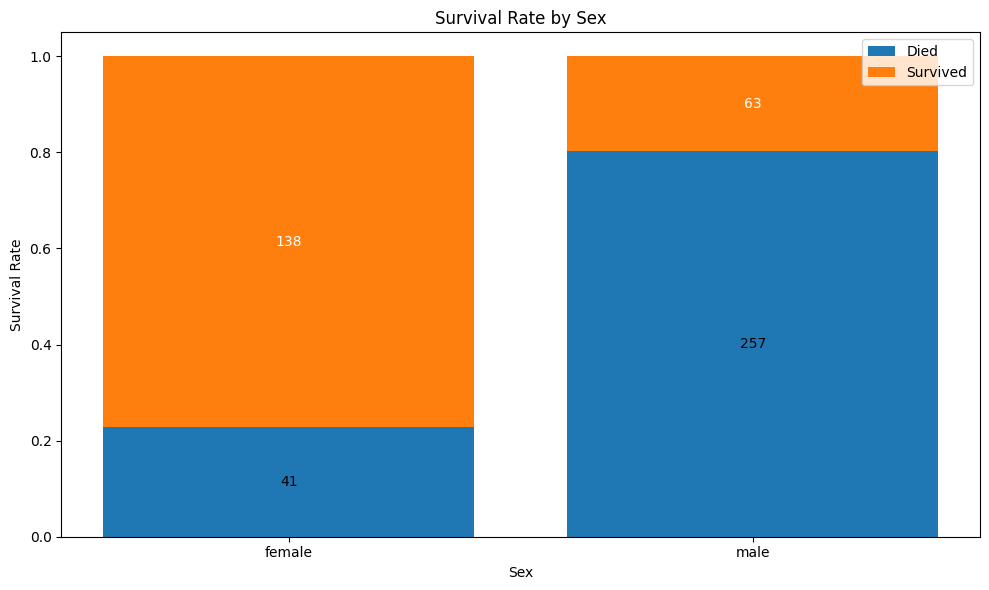

In [198]:
create_chart_by_discr_param('Sex')

Посмотрим, как влияет класс билета пассажира

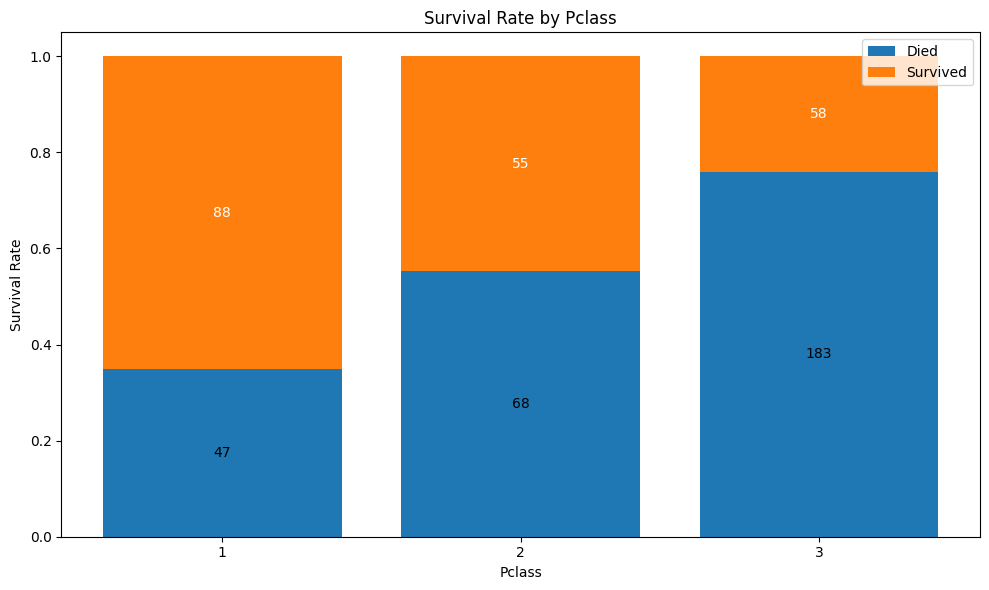

In [199]:
create_chart_by_discr_param('Pclass')

Теперь реализуем функцию для работы с непрерывными параметрами, например `Fare`

In [200]:
from math import ceil

def create_chart_by_cont_param(param):
    X_train_copy = X_train.copy(deep=True)
    step = ceil((max(X_train[param]) + 5) // 6)
    bins = pd.cut(X_train[param], bins=range(0, step * 6 + 1, step))
    X_train_copy[f'{param}_bin'] = bins
    
    survival_rate = X_train_copy.groupby(f'{param}_bin', observed=False).apply(lambda x: y[x.index].sum() / len(x), include_groups=False).reset_index(name='survival_rate')
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=f'{param}_bin', y='survival_rate', data=survival_rate, color='#A3C4F3')

    plt.xlabel(param)
    plt.ylabel('Survival Rate (%)')
    plt.title(f'Survival Rate by {param} Range')
    
    plt.tight_layout()
    plt.show()

Нарисуем зависимость от возраста

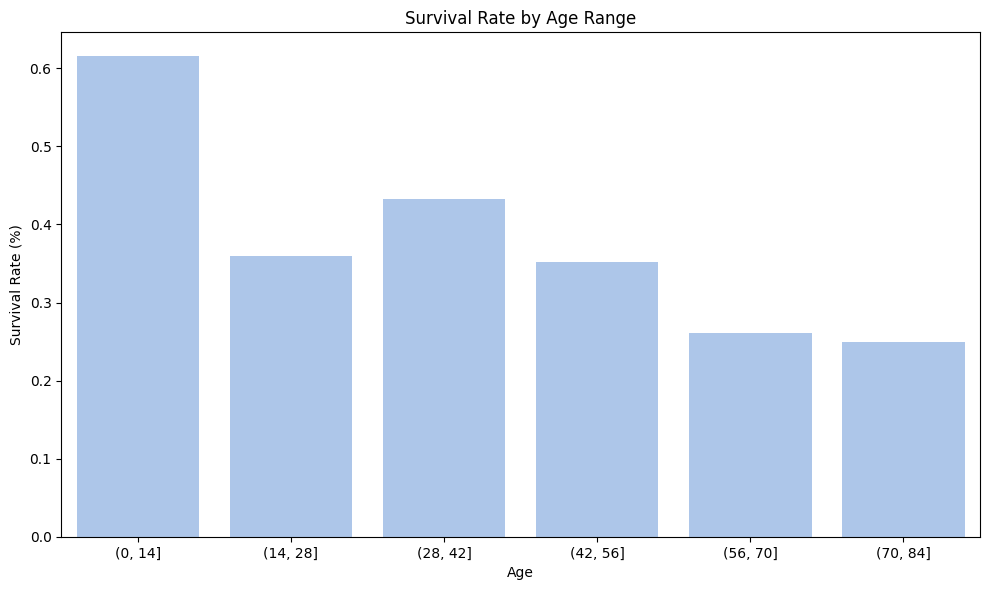

In [201]:
create_chart_by_cont_param('Age')

Теперь от стоимости билета

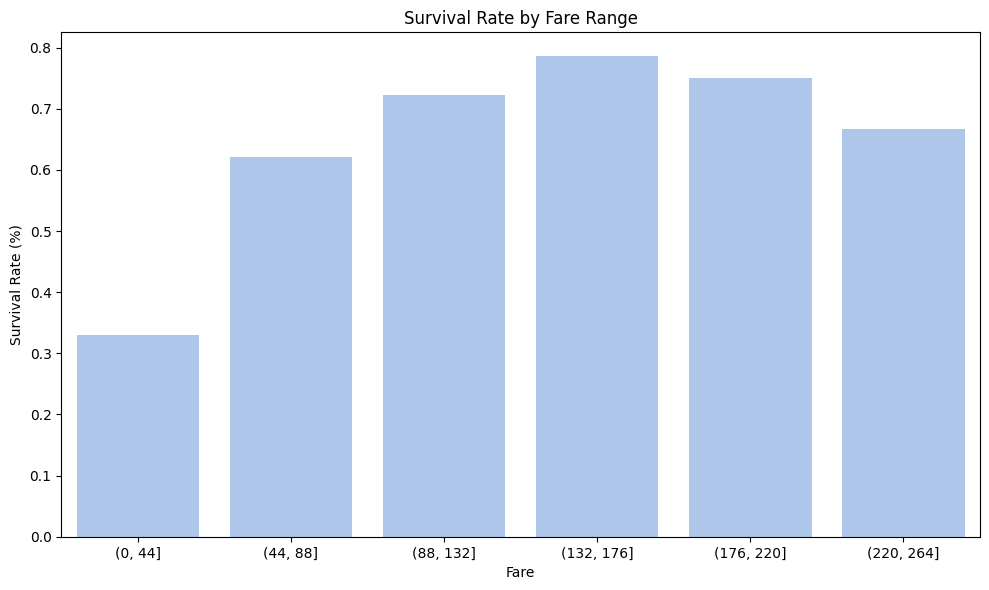

In [202]:
create_chart_by_cont_param('Fare')

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 476dce11b8cac8705a10bff695e4cdee -->
#### 2. Классификация логическими правилами

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики. Любые решения "из коробки" использовать запрещено. Например, достаточно пояснения "*по графику (описание графика) визуально я увидел, что при X > 100 большинство пассажиров выжило, поэтому использую правило (описание правила)*".

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. Дерево из одного листа имеет глубину 0.

*Указание*. Попросите ИИ красиво оформить описание дерева и его пояснение.

**Дерево 1:**

Первое, что бросается в глаза при анализе графиков, — это то, что женщин выжило значительно больше, чем мужчин. Поэтому в первом приближении мы будем делать прогноз о выживаемости, исходя лишь из этого параметра.

**Дерево 2:**

При более детальном анализе можно заметить, что класс билета тоже влияет на выживаемость, вероятно, потому что пассажирам с билетами лучшего класса охотнее предоставлялись места на спасательных шлюпках. Предположим также, что семьи целиком либо отправлялись на шлюпку, либо оставались на корабле. Отсюда можно сделать еще одну эвристику: чем больше семья, тем выше вероятность, что она останется на корабле из-за ограниченности мест и "справедливости" их распределения.

Реализуйте полученные деревья по шаблону

In [203]:
def tree(features: pd.DataFrame, predicate) -> pd.Series:
    return [predicate(people) for _, people in features.iterrows()]

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 509cca15393d5b0fb3cf40b463d12077 -->
Проверьте работоспособность данных моделей на тестовой выборке и оцените качество модели по метрике `accuracy`.

> &#x2755; *Примечание.* Полученные значения не влияют на оценку по заданию. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [204]:
def accuracy(target: pd.Series, predicted: pd.Series) -> float:
    return (target == predicted).sum() / len(target)

Напишем предикат для первого дерева

In [205]:
def predicate_first(features: pd.Series) -> bool:
    return features['Sex'] == 'female'

Проверим его точность

In [206]:
res = accuracy(tree(pd.DataFrame(X_train), predicate_first), y_train)
round(float(res), 2)

0.79

Теперь давайте протестируем второе дерево

In [207]:
def predicate_second(features: pd.Series) -> bool:
    if features['Pclass'] == 1:
        return features['Parch'] <= 2 | features['SibSp'] <= 2
    if features['Pclass'] == 2:
        return features['Parch'] == 1 | features['SibSp'] == 1
    if features['Pclass'] == 3:
        return False

Посмотрим на точность

In [208]:
res = accuracy(tree(pd.DataFrame(X_train), predicate_second), y_train)
round(float(res), 2)

0.65

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 2bf781f25f8969f7e712ea5d28d608a3 -->
#### 3. Классификация методом ближайшего соседа

В данной части задачи оставим только признаки `'Pclass'`, `'Age'`, `'Sex'`,`'Fare'`.


&#x2753; **Вопрос** &#x2753;
> Какие могли бы возникнуть проблемы при использовании признаков `'SibSp'`, `'Parch'`? Имеется ли подобная проблема для признака `'Pclass'`?

**Ваш ответ:**
> В этих данных довольно много выбросов, для `Pclass` такой проблемы нет

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3bfbe10cf933e1302c2f524a99acfa54 -->
Постройте классификатор методом ближайшего соседа. Обучите его и оцените качество модели. Сравните с предыдущим методом.

Пока никаких преобразований данных делать не нужно.




In [209]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

properties = ['Pclass', 'Age', 'Sex','Fare']

del X_train['SibSp'], X_train['Parch']
del X_test['SibSp'], X_test['Parch']

model = KNeighborsClassifier(n_neighbors=5, algorithm="brute")

label_encoder = LabelEncoder()
X_train['Sex'] = label_encoder.fit_transform(X_train['Sex'])
X_test['Sex'] = label_encoder.fit_transform(X_test['Sex'])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
score

0.6697674418604651

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 21227e76b996f62c6c83ee38ce486bdf -->
Попробуем улучшить результаты предсказаний, для этого надо сначала посмотреть на сами данные. Выведите значение минимального и максимального объекта для каждого признака.

In [210]:
for property in X_train:
    print(f'Min and max for property {property} is {X[property].min()}, {X[property].max()}')

Min and max for property Pclass is 1, 3
Min and max for property Age is 0.42, 80.0
Min and max for property Sex is female, male
Min and max for property Fare is 0.0, 512.3292


Как мы видим данные в каждом столбце распределены очень по-разному.

&#x2753; **Вопрос** &#x2753;
> Как это может повлиять на работу kNN, почему?

**Ваш ответ:**
> Это может привести к нежелательному поведению, например, когда при прочих равных признаках сильный разброс по `Fare` существенно влияет на результат


Для решения этой проблемы нужно привести признаки к единому масштабу. Существует много методов масштабирования рассмотрим работу одного из них &mdash; **минимаксная нормализация**

  
> **Минимакс** &mdash; линейное преобразование данных в диапазоне $[0, 1]$, где минимальное и максимальное масштабируемые значения соответствуют 0 и 1 соответственно.
> Реализуется оно по следующей формуле:
>
> $$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}$$
>
> где $x_{ij}$ &mdash; значение признака $j$ для объекта $i$, а $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ в обучающем наборе данных.  
> В модуле `sklearn.preprocessing` есть [класс](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) `MinMaxScaler`, который реализует эту операцию. Давайте рассмотрим методы этого класса подробнее:
>
> * `fit(X)`: вычисляет минимальные и максимальные значения для каждого признака.
>
> * `transform(X)`: применяет масштабирование к данным.
>
> * `fit_transform(X)`: объединяет оба метода, сначала подгоняя модель, а затем трансформируя данные.
>
> * `inverse_transform(X)`: восстанавливает исходные данные из масштабированных.


Стоит отметить что существуют и другие методы масштабирования данных.

&#x2753; **Вопрос** &#x2753;
> В чем может быть недостаток такого метода масштабирования?

**Ваш ответ:**
> Недостаток состоит в том, что такой метод нормализации чувствителен к выбросам, если, например, один `Fare` окажется больше 500, а остальные порядка нескольких десятков, то после масштабирования все они окажутся около нуля


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3cf8b0b6b0402c9ceb439c2de6ee4276 -->


Отмасштабируйте данные

In [211]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train.shape

(499, 4)

Теперь выведите значения максимума и минимума нормализованных признаков. Обратите внимание `MinMaxScaler` возвращается объект в виде `np.ndarray`.

In [212]:
for i, property in enumerate(properties):
    print(f'Min and max for property {property} is {np.min(X_train[:, i])}, {np.max(X_train[:, i])}')

Min and max for property Pclass is 0.0, 1.0
Min and max for property Age is 0.0, 1.0
Min and max for property Sex is 0.0, 1.0
Min and max for property Fare is 0.0, 1.0


Обучите модель и сравните результат предсказаний со стандартизацией и без.

In [213]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
score

0.7767441860465116

**Вывод:** На точность предсказания модели влияет не только гиперпараметр тренировки(количество соседей), но и сами данные в тренировочной выборке, а также метрика, по которой ищутся соседи

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 02a5bc7d6f2e8382a04db099c58ba6d1 -->
**А можем ли мы как-то еще повысить точность модели?**

Как мы видели, параметр $k$ числа соседей является необучаемым т.е. гиперпараметром, который выставляется вручную. Выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.



Постройте график зависимости точности (`accuracy_score`) от значения $k$ (от 1 до 20) для обучающей и тестовой выборок.

Зададим набор параметров отрисовки

In [214]:
metrics = ['euclidean']
data_sets = [('X_train', 'y_train', 'X_test', 'y_test'), ('X_train', 'y_train', 'X_train', 'y_train')]
labels = ['test', 'train']
colors = ['blue', 'green']

Отрисуем графики

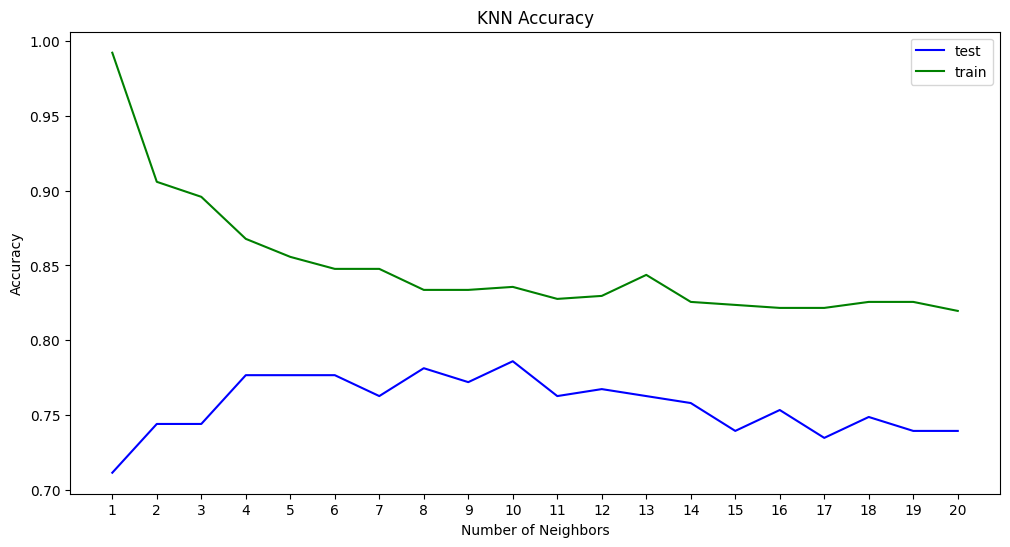

In [215]:
draw_chart(metrics, data_sets, labels, colors)

**Вывод:** В работе я исследовал метод классического машинного обучения kNN, оптимизировал гиперпараметр - количество соседей, показал, насколько существенно может улучшиться качество предсказаний при правильном масштабировании данных, а также сравнил результат с предсказанием, исходя из логики и ручного анализа графиков